In [1]:
import pandas as pd
from process_data import  get_df
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.float_format', lambda x: '%.0f' % x)

df = get_df()
df

postgres_connection


Bearer Id            Start  Start ms              End  \
0      13114483460844900352   4/4/2019 12:01       770  4/25/2019 14:35   
1      13114483482878900224   4/9/2019 13:04       235   4/25/2019 8:15   
2      13114483484080500736   4/9/2019 17:42         1  4/25/2019 11:58   
3      13114483485442799616   4/10/2019 0:31       486   4/25/2019 7:36   
4      13114483499480700928  4/12/2019 20:10       565  4/25/2019 10:40   
...                     ...              ...       ...              ...   
149996  7277825670196679680   4/29/2019 7:28       451   4/30/2019 6:02   
149997  7349883264234609664   4/29/2019 7:28       483  4/30/2019 10:41   
149998 13114483573367300096   4/29/2019 7:28       283  4/30/2019 10:46   
149999 13114483573367300096   4/29/2019 7:28       696  4/30/2019 10:40   
150000                  NaN             None       NaN             None   

        End ms  Dur. (ms)            IMSI  MSISDN/Number           IMEI  \
0          662    1823652 208201448079117    33664962239 35521209507511   
1          606    1365104 208201909211140    33681854413 35794009006359   
2          652    1361762 208200314458056    33760627129 35281510359387   
3          171    1321509 208201402342131    33750343200 35356610164913   
4          954    1089009 208201401415120    33699795932 35407009745539   
...        ...        ...             ...            ...            ...   
149996     214      81230 208202201200072    33650688697 35483109451938   
149997     187      97970 208201908153249    33663449963 35660508296467   
149998     810      98249 208201711161187    33621890103 35721209870907   
149999     327      97910 208202101098075    33619622058 86186204011457   
150000     NaN        NaN             NaN            NaN            NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...            15854611             2501332   
1                     L77566A  ...            20247395            19111729   
2                     D42335A  ...            19725661            14699576   
3                     T21824A  ...            21388122            15146643   
4                     D88865A  ...            15259380            18962873   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...            16191667            11763428   
149997                D10223C  ...            13877234             8288284   
149998                T51102A  ...            22660510             1855903   
149999                L88342B  ...             8817106             8305402   
150000                   None  ...            11634073            11009410   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0                  8198936             9656251          278082303   
1                 18338413            17227132          608750074   
2                 17587794             6163408          229584621   
3                 13994646             1097942          799538153   
4                 17124581              415218          527707248   
...                    ...                 ...                ...   
149996            17883703            19678161          526609673   
149997            19350146            21293148          626893062   
149998             9963942             5065760          553539484   
149999             3322253            13172589          352536971   
150000            11626852            11001755          422044703   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0                14344150         171744450           8814393   
1                 1170709         526904238          15055145   
2                  395630         410692588           4215763   
3                10849722         749039933          12797283   
4                 3529801         550709500          13910322   
...                   ...               ...               ..

In [2]:
# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# sessions frequency 

session_frequency = df['MSISDN/Number'].value_counts()
session_frequency = session_frequency .reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']

# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# total data usage (DL and UL)
import pandas as pd


df['Total Data Usage'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)'] 

# Group by customer_id and sum the session durations and total data usage
total_data_usage_dur = df.groupby('MSISDN/Number')[['Total Data Usage', 'Dur. (ms)']].sum()

total_data_usage_dur

Total Data Usage  Dur. (ms)
MSISDN/Number                               
33601001722             878690574     116720
33601001754             156859643     181230
33601002511             595966483     134969
33601007832             422320698      49878
33601008617            1457410944      37104
...                           ...        ...
33789996170             714641641       8810
33789997247             480307335     140988
3197020876596           232123971     877385
337000037000919         596287824     253030
882397108489451         139153646     869844

[106856 rows x 2 columns]

In [3]:
# merge
merged_df = pd.merge(session_frequency, total_data_usage_dur,  on='MSISDN/Number', how='outer')
merged_df

MSISDN/Number  session_frequency  Total Data Usage  Dur. (ms)
0         33626320676                 18        7971167261    8791927
1         33614892860                 17        8846226494    9966898
2         33625779332                 17        8499620722   18553754
3         33659725664                 16        7705862783    4035428
4         33760536639                 15        8514773963    9279434
...               ...                ...               ...        ...
106851    33660679060                  1         646349893      56896
106852    33645165347                  1         634702779      97547
106853    33658209707                  1         197565402      93169
106854    33663377441                  1         734390097      95564
106855    33619622058                  1         401522016      97910

[106856 rows x 4 columns]

In [4]:
merged_df.isnull().sum()

MSISDN/Number        0
session_frequency    0
Total Data Usage     0
Dur. (ms)            0
dtype: int64

/mnt/d/tenacademy/codes/week1/eda/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


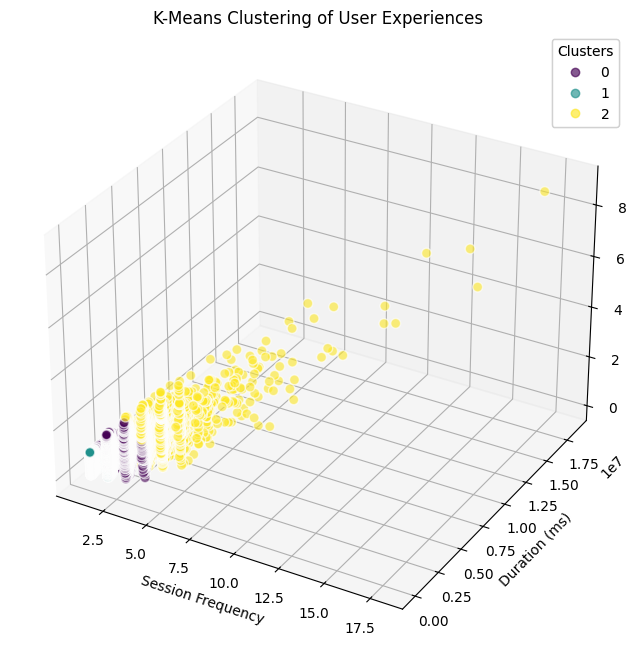

In [5]:

# Select the engagement metrics for clustering
engagement_metrics = [
    'Total Data Usage',
    'Dur. (ms)',
    'session_frequency',
]

# Drop rows with missing values in the selected columns
df_cluster = merged_df[engagement_metrics].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using a rearranged 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_cluster['session_frequency'],
    df_cluster['Dur. (ms)'],
    df_cluster['Total Data Usage'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='w'
)

ax.set_xlabel('Session Frequency')
ax.set_ylabel('Duration (ms)')
ax.set_zlabel('Total Data Usage')
ax.set_title('K-Means Clustering of User Experiences')

legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()
